<a href="https://colab.research.google.com/github/maciejlehmann/175IC-machine-learning/blob/main/Zad_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


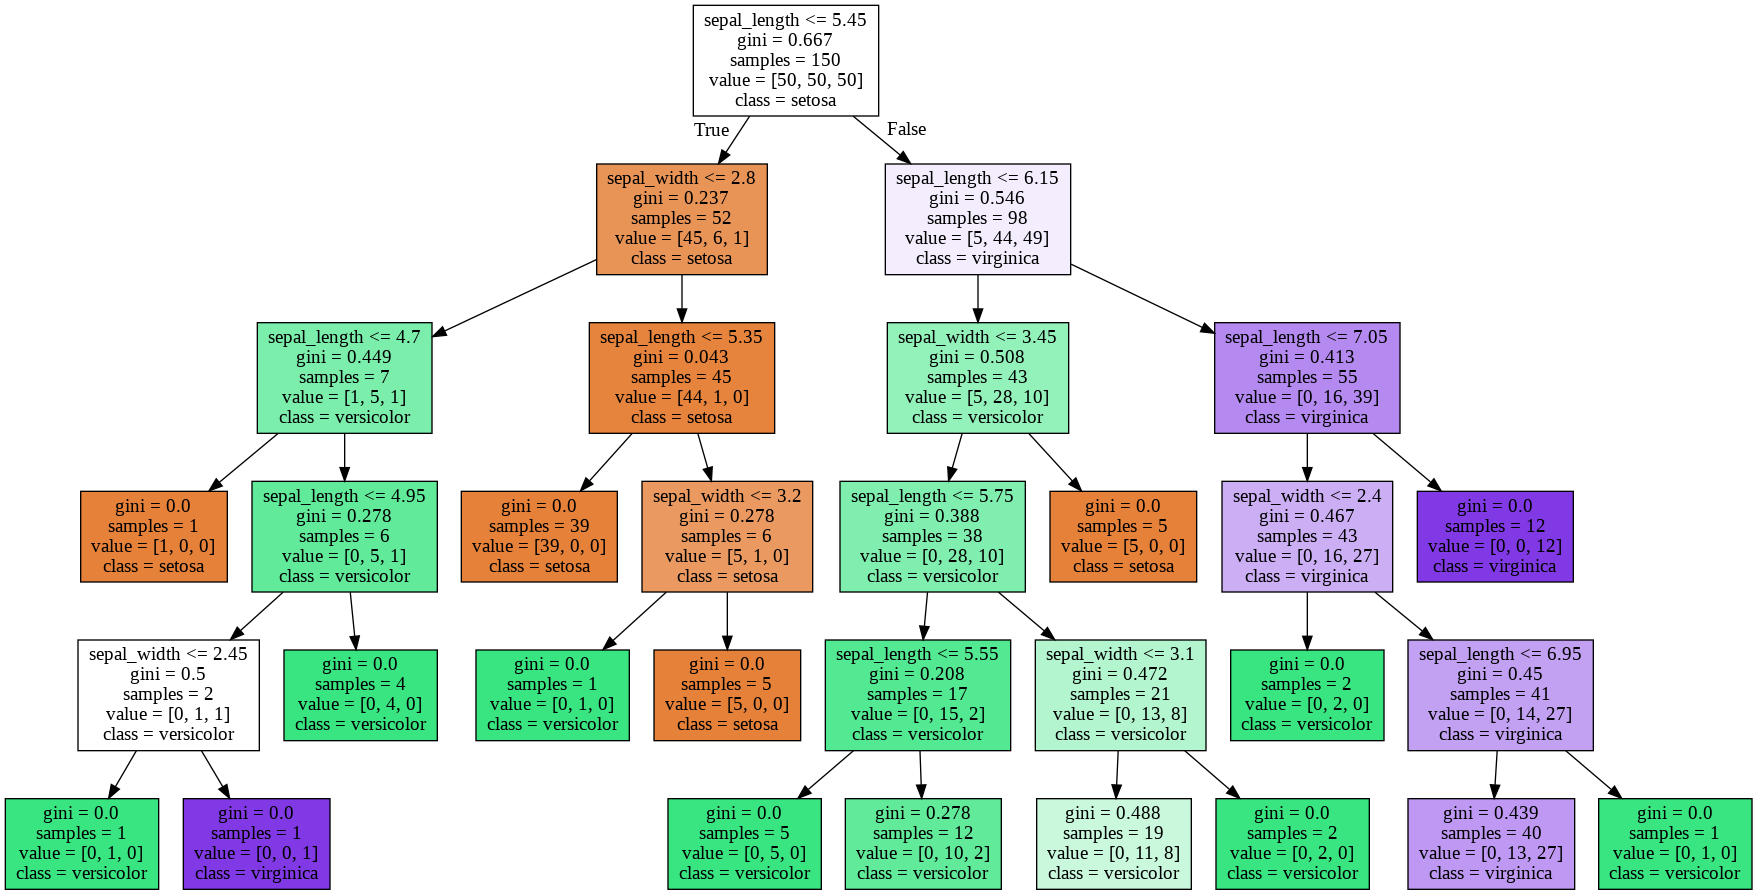

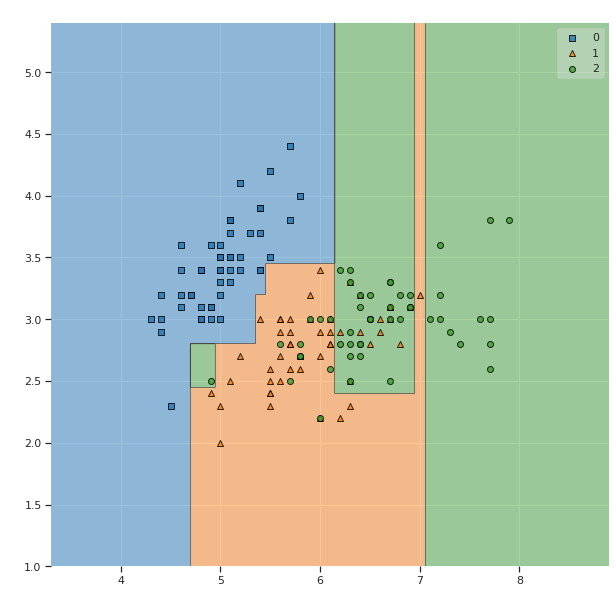

In [42]:
from scipy.stats import entropy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

import math
import pydotplus


# -((50 / 150)) * np.log2(50 / 150) + (50 / 150) * np.log2(50 / 150) + (50 / 150) * np.log2(50 / 150)
# -((47 / 59)) * np.log2(47 / 59) + (11 / 59) * np.log2(11 / 59) + (1 / 59) * np.log2(1 / 59)
# -((3 / 91)) * np.log2(3 / 91) + (39 / 91) * np.log2(39 / 91) + (49 / 91) * np.log2(49 / 91)

# print(entropy([0.5, 0.5], base=2))
# print(entropy([0.8, 0.2], base=2))
# print(entropy([0.95, 0.05], base=2))

# 1 - (50 / 150)**2 - (50 / 150)**2 - (50 / 150)**2
# 1 - (45 / 52)**2 - (6 / 52)**2 - (1 / 52)**2
# 1 - (5 / 98)**2 - (44 / 98)**2 - (49 / 98)**2

sns.set()
np.random.seed(32)
 
raw_data = load_iris()
all_data = raw_data.copy()
 
data = all_data['data']
target = all_data['target']
feature_names = [name.replace(' ', '_')[:-5] for name in all_data['feature_names']]
target_names = all_data['target_names']
 
# print(f'Liczba probek: {len(data)}')
# print(f'Ksztalt danych: {data.shape}')
# print(f'Nazwy zmiennych objaśniających: {feature_names}')
# print(f'Nazwy kategorii kosaćca: {target_names}')

df = pd.DataFrame(data=np.c_[data, target], columns=feature_names + ['target'])
# df.head()

# plt.figure(figsize=(8, 6))
# sns.scatterplot('sepal_length', 'sepal_width', hue='target', data=df)

data = df.copy()
#wybieramy kolumny które nas interesują
data = data[['sepal_length', 'sepal_width', 'target']]
# przerzucamy target do osobnej zmiennej
target = data.pop('target')

# classifier = DecisionTreeClassifier(max_depth=1)
# classifier.fit(data, target)

# # liczymy dokładność naszego drzewa decyzyjnego
# acc = classifier.score(data, target)

# plt.figure(figsize=(8, 6))
# # tu określamy dane wejściowe, wyjściowe i model, ktory nauczyliśmy
# plot_decision_regions(np.array(data), np.array(target).astype(np.integer), classifier)

# plt.xlabel('sepal lenght (cm)', color='White')
# plt.ylabel('sepal width (cm)', color='White')
# plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%', color='White')
# # plt.show()

# dot_data = StringIO()

# export_graphviz(classifier, out_file=dot_data, feature_names=feature_names[:2], class_names=target_names, filled=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png(), width=300)

def make_decision_tree(max_depth=1):
  #trenowanie modelu
  classifier = DecisionTreeClassifier(max_depth=max_depth)
  classifier.fit(data, target)

  # eksport grafu drzewa
  dot_data = StringIO()
  export_graphviz(classifier, out_file=dot_data, feature_names=feature_names[:2], class_names=target_names, filled=True)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

  # obliczanie dokładności
  acc = classifier.score(data,target)

  # wykreślenie granic decyzyjnych
  plt.figure(figsize=(10, 10))
  ax = plot_decision_regions(np.array(data), np.array(target).astype(np.integer), classifier)
  plt.xlabel('sepal lenght (cm)', color='White')
  plt.ylabel('sepal width (cm)', color='White')
  plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%', color='White')

  return Image(graph.create_png(), width=200 + max_depth * 120)

make_decision_tree(5)